In [1]:
#@title Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title Load datasets
df_ghana = pd.read_excel('ghana.xlsx')
df_burkina = pd.read_excel('burkina_faso.xlsx')
df_togo = pd.read_excel('togo.xlsx')
df_cote = pd.read_excel('cote_divoire.xlsx')

print('Datasets loaded successfully')

Datasets loaded successfully


In [3]:
# Function to display basic information about the dataset
def explore_data(df, country_name):
    print(f"\n{country_name} Dataset")
    print(df.head())
    print(df.info())
    print(df.describe())

# Explore each dataset

In [4]:
# Burkina Faso
explore_data(df_burkina, 'Burkina Faso')


Burkina Faso Dataset
   Country Name  Burkina Faso
0          1960         6.248
1          1961         6.286
2          1962         6.322
3          1963         6.356
4          1964         6.419
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  63 non-null     int64  
 1   Burkina Faso  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None
       Country Name  Burkina Faso
count     63.000000     62.000000
mean    1991.000000      6.460306
std       18.330303      0.653971
min     1960.000000      4.772000
25%     1975.500000      6.173000
50%     1991.000000      6.615500
75%     2006.500000      6.948000
max     2022.000000      7.256000


In [5]:
# Cote D'Ivoire
explore_data(df_cote, 'Cote d\'Ivoire')


Cote d'Ivoire Dataset
   Country Name  Cote d'Ivoire
0          1960          7.691
1          1961          7.720
2          1962          7.750
3          1963          7.781
4          1964          7.811
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   63 non-null     int64  
 1   Cote d'Ivoire  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None
       Country Name  Cote d'Ivoire
count     63.000000      62.000000
mean    1991.000000       6.512242
std       18.330303       1.223866
min     1960.000000       4.418000
25%     1975.500000       5.397000
50%     1991.000000       6.668000
75%     2006.500000       7.742500
max     2022.000000       7.942000


In [6]:
# Ghana
explore_data(df_ghana, 'Ghana')


Ghana Dataset
   Unnamed: 0  Indicator Name  Fertility rate, total (births per woman)
0         NaN            1960                                     6.847
1         NaN            1961                                     6.886
2         NaN            1962                                     6.947
3         NaN            1963                                     6.980
4         NaN            1964                                     6.931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                0 non-null      float64
 1   Indicator Name                            63 non-null     int64  
 2   Fertility rate, total (births per woman)  62 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB
None
       Unnamed: 0  Indicator Name  Fertil

In [7]:
# Togo
explore_data(df_togo, 'Togo')


Togo Dataset
   Country Name   Togo
0          1960  6.717
1          1961  6.753
2          1962  6.803
3          1963  6.850
4          1964  6.873
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  63 non-null     int64  
 1   Togo          62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None
       Country Name       Togo
count     63.000000  62.000000
mean    1991.000000   5.953339
std       18.330303   0.969218
min     1960.000000   4.257000
25%     1975.500000   5.075750
50%     1991.000000   6.091000
75%     2006.500000   6.894750
max     2022.000000   7.153000


In [8]:
df_burkina.head()

,Country Name,Burkina Faso
0,1960,6.248
1,1961,6.286
2,1962,6.322
3,1963,6.356
4,1964,6.419


In [9]:
df_ghana.head()

,Unnamed: 0,Indicator Name,"Fertility rate, total (births per woman)"
0,NaN,1960,6.847
1,NaN,1961,6.886
2,NaN,1962,6.947
3,NaN,1963,6.980
4,NaN,1964,6.931


In [10]:
df_cote.head()

,Country Name,Cote d'Ivoire
0,1960,7.691
1,1961,7.720
2,1962,7.750
3,1963,7.781
4,1964,7.811


In [11]:
df_togo.head()

,Country Name,Togo
0,1960,6.717
1,1961,6.753
2,1962,6.803
3,1963,6.850
4,1964,6.873




> It's obvious that all the datasets are not in their right shapes and state. The Ghana dataset has additional unwanted columns that have to be cleaned. Let's get the datasets in shape.



In [12]:
# Print the column names of the Ghana dataset to understand its structure
print(df_ghana.columns)

Index(['Unnamed: 0', 'Indicator Name',
       'Fertility rate, total (births per woman)'],
      dtype='object')


In [13]:
# Drop unnecessary columns and rename columns for consistency
df_ghana = df_ghana.drop(columns=['Unnamed: 0'], axis = 1)
df_ghana.columns = ['Year', 'Fertility Rate']

# Rename columns for consistency
df_burkina.columns = ['Year', 'Fertility Rate']
df_cote.columns = ['Year', 'Fertility Rate']
df_togo.columns = ['Year', 'Fertility Rate']

In [14]:
df_ghana.head()

,Year,Fertility Rate
0,1960,6.847
1,1961,6.886
2,1962,6.947
3,1963,6.980
4,1964,6.931


In [15]:
# Function to plot the time series data
def plot_time_series(df, country_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df['Fertility Rate'], marker='o', label=country_name)
    plt.xlabel('Year')
    plt.ylabel('Fertility Rate')
    plt.title(f'Fertility Rate over Time for {country_name}')
    plt.legend()
    plt.show()

# Plot time series data for each country

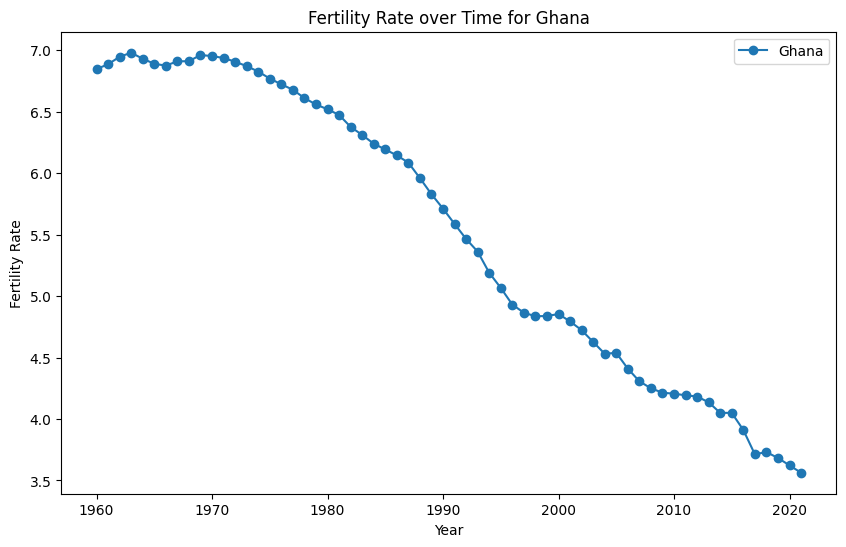

In [16]:
# Ghana
plot_time_series(df_ghana, 'Ghana')

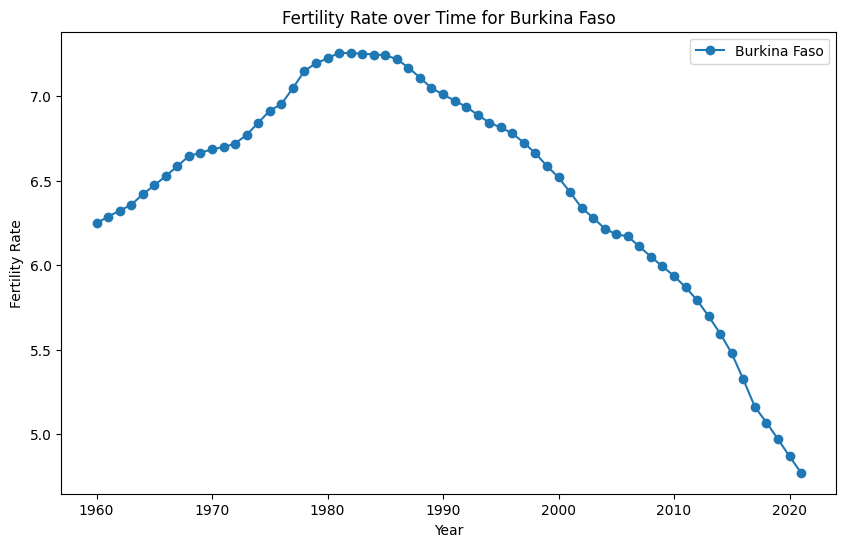

In [17]:
# Burkina Faso
plot_time_series(df_burkina, 'Burkina Faso')

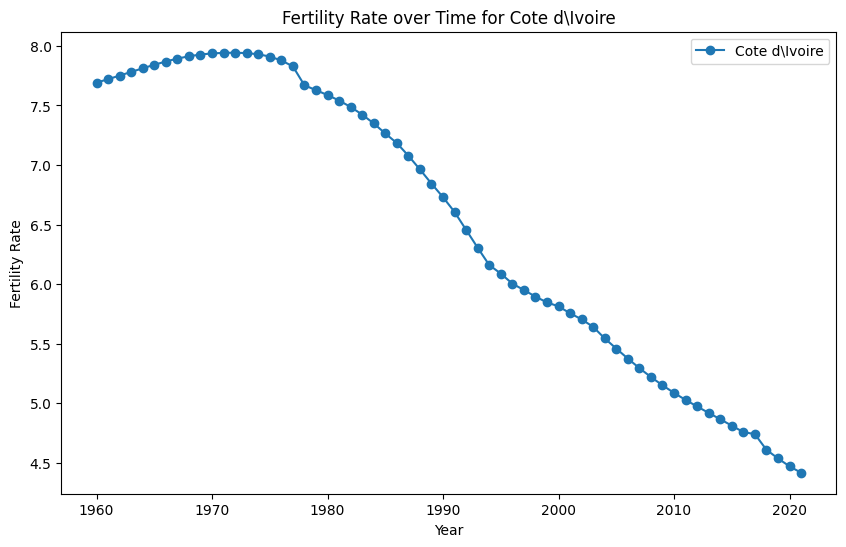

In [18]:
# Cote D'Ivoire
plot_time_series(df_cote, 'Cote d\Ivoire')

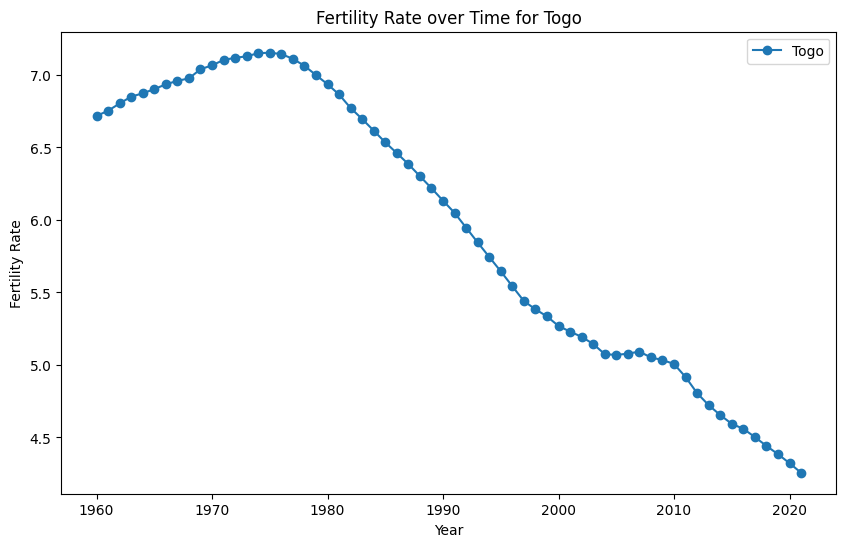

In [19]:
# Togo
plot_time_series(df_togo, 'Togo')

# Preprocess the dataset for time series modeling

In [20]:
# Function to preprocess the data
def preprocess_data(df):
    """
    This function prepares dataset to be in the format ready for time series modeling.

    Parameters:
    df (pandas.DataFrame): The input dataset.

    Returns:
    pandas.DataFrame: Preprocessed dataset.
    """
    df = df.dropna()  # Handle missing values by dropping them
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    return df

In [21]:
# Preprocess each dataset
df_burkina = preprocess_data(df_burkina)
df_cote = preprocess_data(df_cote)
df_ghana = preprocess_data(df_ghana)
df_togo = preprocess_data(df_togo)

print("Datasets preprocessed successfully!")

Datasets preprocessed successfully!


In [22]:
df_ghana.head()

,Fertility Rate
Year,
1960-01-01,6.847
1961-01-01,6.886
1962-01-01,6.947
1963-01-01,6.980
1964-01-01,6.931


In [23]:
# explore Ghana Fertility rate
df_ghana.describe()

,Fertility Rate
count,62.000000
mean,5.536339
std,1.177931
min,3.563000
25%,4.440250
50%,5.649500
75%,6.758250
max,6.980000


In [24]:
# year with the highest fertility rate in Ghana's history
df_ghana[df_ghana['Fertility Rate'] == df_ghana['Fertility Rate'].max()]

,Fertility Rate
Year,
1963-01-01,6.98


In [25]:
# year with the lowest fertility rate in Ghana's history
df_ghana[df_ghana['Fertility Rate'] == df_ghana['Fertility Rate'].min()]

,Fertility Rate
Year,
2021-01-01,3.563


In [26]:
df_togo.describe()

,Fertility Rate
count,62.000000
mean,5.953339
std,0.969218
min,4.257000
25%,5.075750
50%,6.091000
75%,6.894750
max,7.153000


In [27]:
# year with the highest fertility rate in Togo's history
df_togo[df_togo['Fertility Rate'] == df_togo['Fertility Rate'].max()]

,Fertility Rate
Year,
1975-01-01,7.153


In [28]:
# year with the lowest fertility rate in Togo's history
df_togo[df_togo['Fertility Rate'] == df_togo['Fertility Rate'].min()]

,Fertility Rate
Year,
2021-01-01,4.257


In [29]:
df_burkina.describe()

,Fertility Rate
count,62.000000
mean,6.460306
std,0.653971
min,4.772000
25%,6.173000
50%,6.615500
75%,6.948000
max,7.256000


In [30]:
# year with the highest fertility rate in Burkina Faso's history
df_burkina[df_burkina['Fertility Rate'] == df_burkina['Fertility Rate'].max()]

,Fertility Rate
Year,
1981-01-01,7.256


In [31]:
# year with the lowest fertility rate in Burkina Faso's history
df_burkina[df_burkina['Fertility Rate'] == df_burkina['Fertility Rate'].min()]

,Fertility Rate
Year,
2021-01-01,4.772


In [32]:
df_cote.describe()

,Fertility Rate
count,62.000000
mean,6.512242
std,1.223866
min,4.418000
25%,5.397000
50%,6.668000
75%,7.742500
max,7.942000


In [33]:
# year with the highest fertility rate in Cote d'Ivoire's history
df_cote[df_cote['Fertility Rate'] == df_cote['Fertility Rate'].max()]

,Fertility Rate
Year,
1972-01-01,7.942


In [34]:
# year with the lowest fertility rate in Cote d'Ivoire's history
df_cote[df_cote['Fertility Rate'] == df_cote['Fertility Rate'].min()]

,Fertility Rate
Year,
2021-01-01,4.418


In [35]:
# Function to check stationarity using the Augmented Dickey-Fuller test
def check_stationarity(ts):
    result = adfuller(ts)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    return result[1] < 0.05

In [36]:
# check stationarity for Ghana fertility rate data
check_stationarity(df_ghana['Fertility Rate'])

ADF Statistic: 0.7347541519466666
p-value: 0.9905065302960567
Critical Value (1%): -3.5443688564814813
Critical Value (5%): -2.9110731481481484
Critical Value (10%): -2.5931902777777776


False

In [37]:
# check for stationarity for Burkina Faso dataset
check_stationarity(df_burkina['Fertility Rate'])

ADF Statistic: -0.10717369344597354
p-value: 0.9487193015534358
Critical Value (1%): -3.5443688564814813
Critical Value (5%): -2.9110731481481484
Critical Value (10%): -2.5931902777777776


False

In [38]:
# check for stationarity for Cote D'Ivoire dataset
check_stationarity(df_cote['Fertility Rate'])

ADF Statistic: -0.2699955208728221
p-value: 0.9296476740223935
Critical Value (1%): -3.5463945337644063
Critical Value (5%): -2.911939409384601
Critical Value (10%): -2.5936515282964665


False

In [39]:
# chekc for stationarity for Togo dataset
check_stationarity(df_togo['Fertility Rate'])

ADF Statistic: -0.14210050061893206
p-value: 0.9450803325046117
Critical Value (1%): -3.5443688564814813
Critical Value (5%): -2.9110731481481484
Critical Value (10%): -2.5931902777777776


False

The results show clearly that the datasets aren't stationary. To achieve better results, we need to stationarize them by differencing.

In [40]:
# Function to plot ACF and PACF
def plot_acf_pacf(ts):
    plot_acf(ts)
    plot_pacf(ts)
    plt.show()


Burkina Faso:



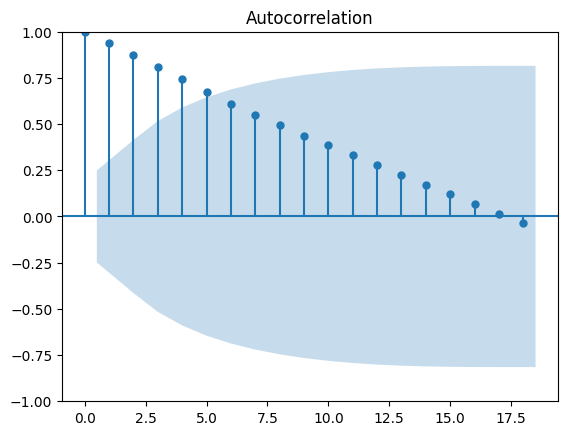

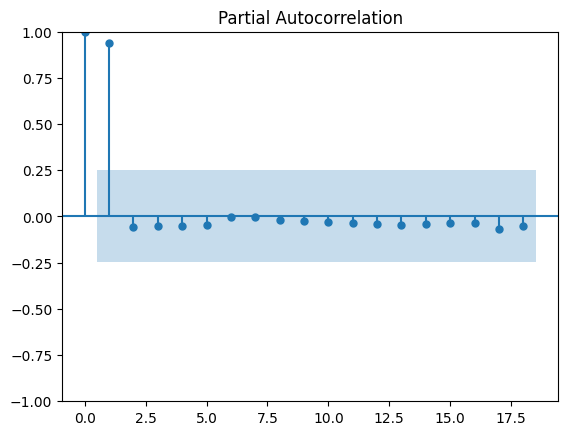


Cote d'Ivoire:



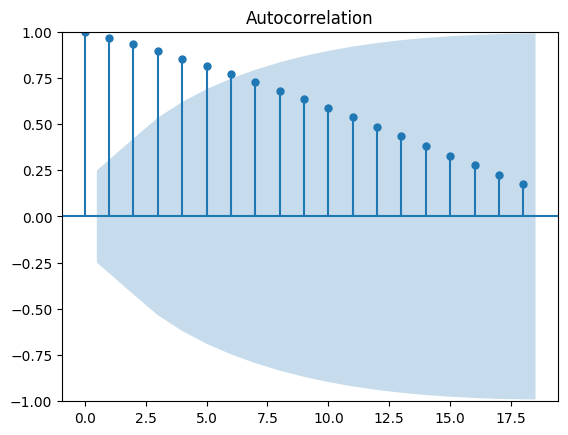

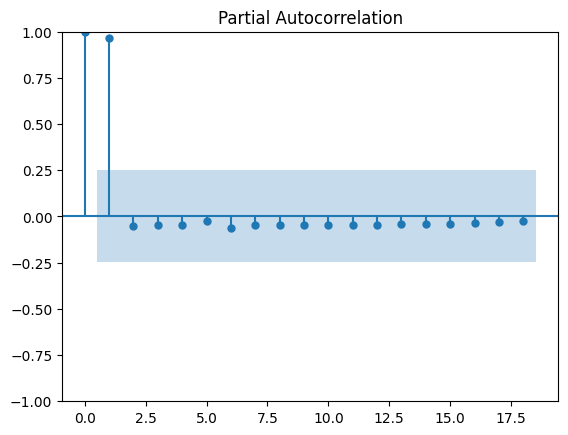


Ghana:



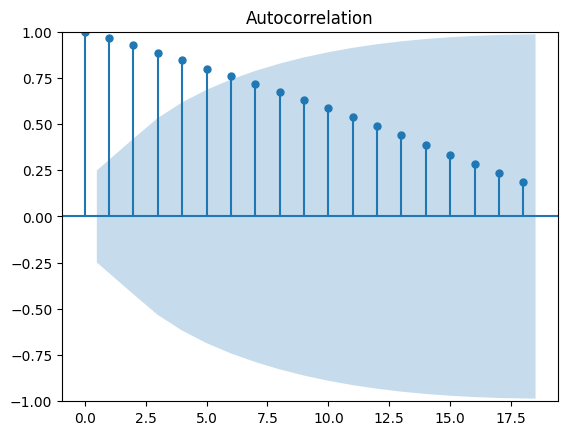

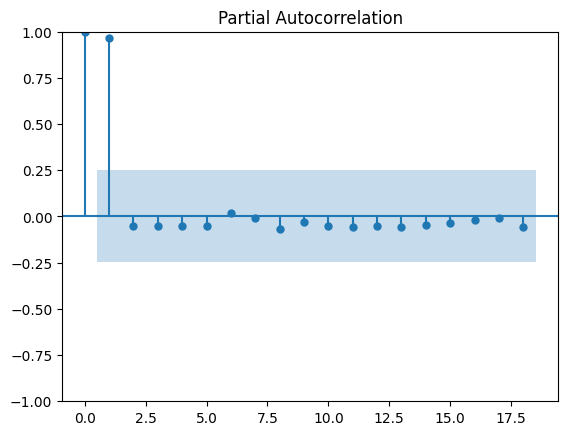


Togo:



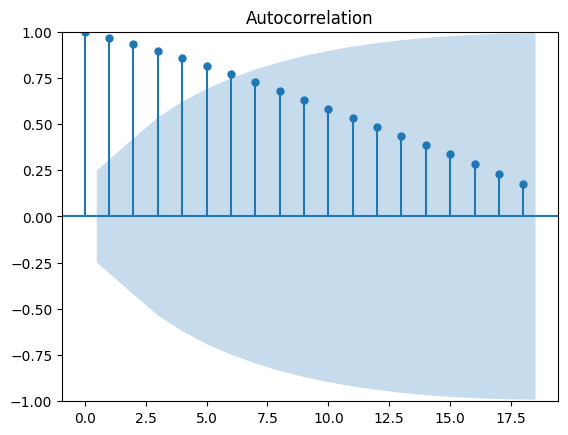

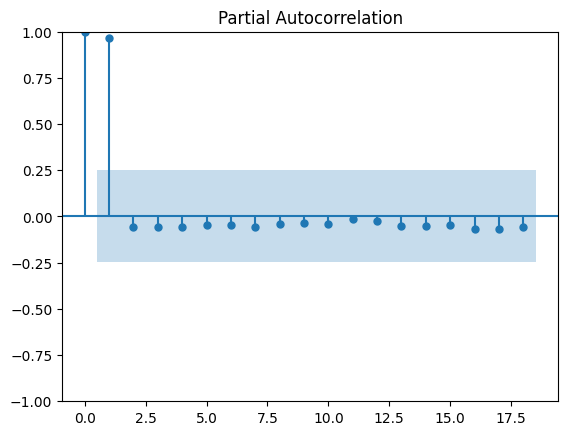

In [41]:
# Plot ACF and PACF plots for each country's data
countries = {'Burkina Faso': df_burkina, 'Cote d\'Ivoire': df_cote, 'Ghana': df_ghana, 'Togo': df_togo}
for country, data in countries.items():
    print(f'\n{country}:\n')
    ts = data['Fertility Rate']
    plot_acf_pacf(ts)



> For ADF,


*   Null Hypothesis: The time series data is not stationary
*   Alternative Hypothesis: The time series is stationary





In [42]:
# difference all the datasets to bring stationarity
countries = {'Burkina Faso': df_burkina, 'Cote d\'Ivoire': df_cote, 'Ghana': df_ghana, 'Togo': df_togo}
for country, data in countries.items():
    print(f'\n{country}:\n')
    ts = data['Fertility Rate']
    ts_diff = ts.diff().dropna()
    check_stationarity(ts_diff)

# differencing one time does not bring stationarity to all the dataset expect that of Ghana.
# a second difference will solve this problem.


Burkina Faso:

ADF Statistic: -1.2888418387285017
p-value: 0.6342615994705314
Critical Value (1%): -3.5443688564814813
Critical Value (5%): -2.9110731481481484
Critical Value (10%): -2.5931902777777776

Cote d'Ivoire:

ADF Statistic: -2.167833579905714
p-value: 0.21812639969894954
Critical Value (1%): -3.5463945337644063
Critical Value (5%): -2.911939409384601
Critical Value (10%): -2.5936515282964665

Ghana:

ADF Statistic: -4.474322484074199
p-value: 0.00021874957687813775
Critical Value (1%): -3.5443688564814813
Critical Value (5%): -2.9110731481481484
Critical Value (10%): -2.5931902777777776

Togo:

ADF Statistic: -2.0495226164477254
p-value: 0.26528982480215213
Critical Value (1%): -3.5443688564814813
Critical Value (5%): -2.9110731481481484
Critical Value (10%): -2.5931902777777776


In [43]:
# second difference for the datasets that where not stationarity upon first difference.
countries = {'Burkina Faso': df_burkina, 'Cote d\'Ivoire': df_cote, 'Togo': df_togo}
for country, data in countries.items():
    print(f'\n{country}:\n')
    ts = data['Fertility Rate']
    ts_diff = ts.diff().dropna().diff().dropna()
    check_stationarity(ts_diff)


Burkina Faso:

ADF Statistic: -6.898666146635265
p-value: 1.2989690906930603e-09
Critical Value (1%): -3.548493559596539
Critical Value (5%): -2.912836594776334
Critical Value (10%): -2.594129155766944

Cote d'Ivoire:

ADF Statistic: -11.433739704040862
p-value: 6.422753139862844e-21
Critical Value (1%): -3.5463945337644063
Critical Value (5%): -2.911939409384601
Critical Value (10%): -2.5936515282964665

Togo:

ADF Statistic: -6.566585599378723
p-value: 8.130330909812912e-09
Critical Value (1%): -3.548493559596539
Critical Value (5%): -2.912836594776334
Critical Value (10%): -2.594129155766944




> The datasets are stationary upon second difference.



In [44]:
df_ghana.head()

,Fertility Rate
Year,
1960-01-01,6.847
1961-01-01,6.886
1962-01-01,6.947
1963-01-01,6.980
1964-01-01,6.931


In [45]:
# # difference the datasets
# df_ghana = df_ghana.diff().dropna()   # first difference

# df_burkina = df_burkina.diff().dropna().diff().dropna()   # second difference
# df_cote = df_cote.diff().dropna().diff().dropna()   # second difference
# df_togo = df_togo.diff().dropna().diff().dropna()   # second difference

# print('Datasets differenced successfully!')


Burkina Faso:



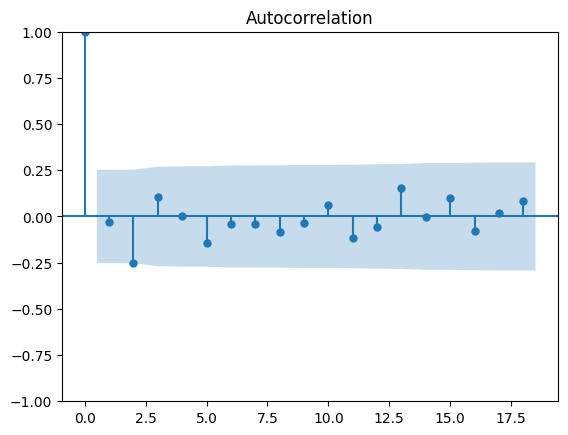

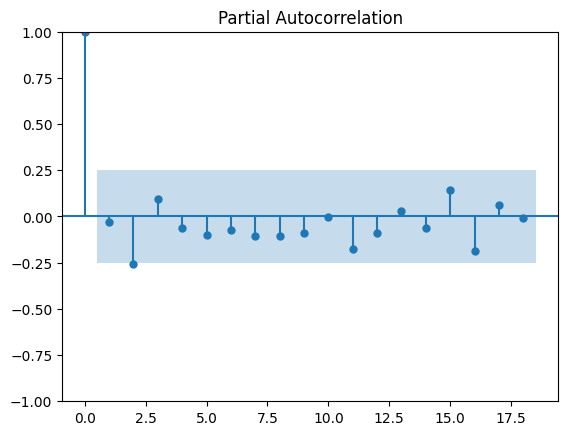


Cote d'Ivoire:



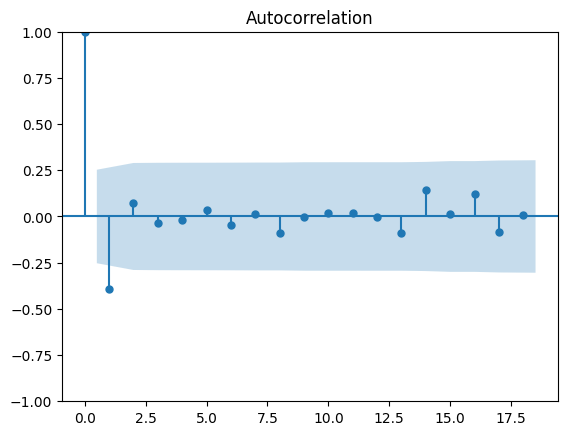

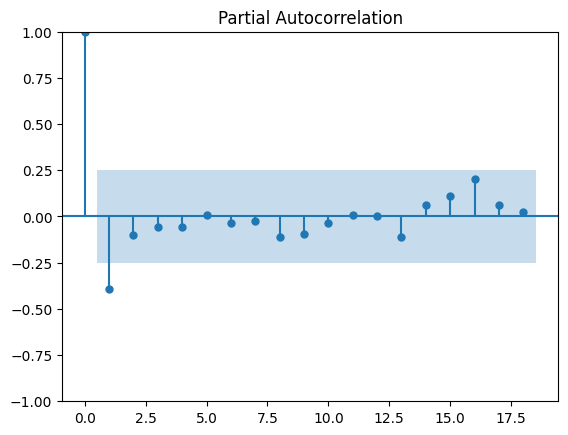


Ghana:



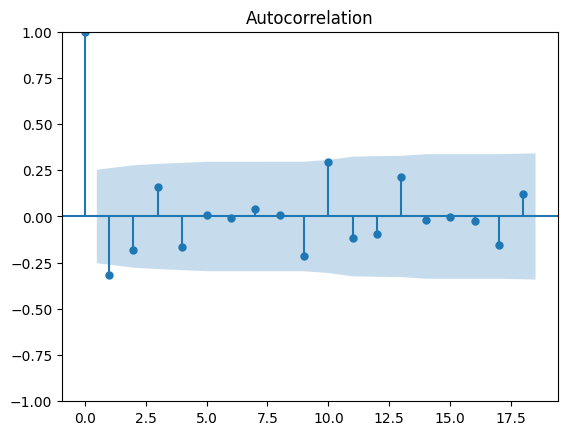

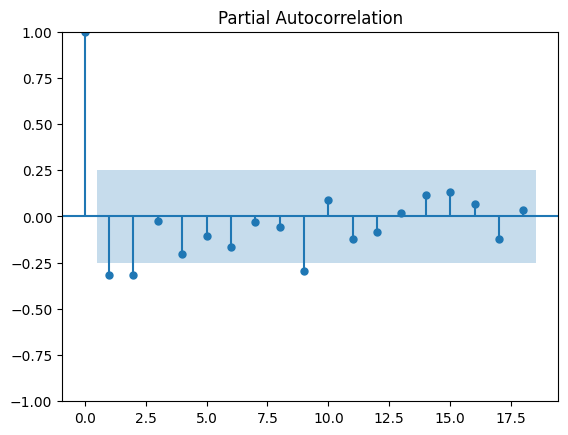


Togo:



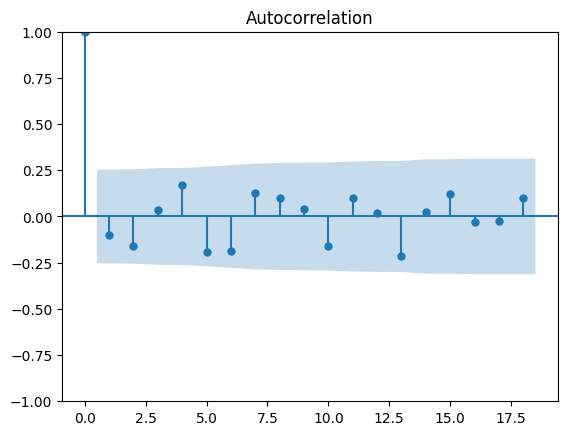

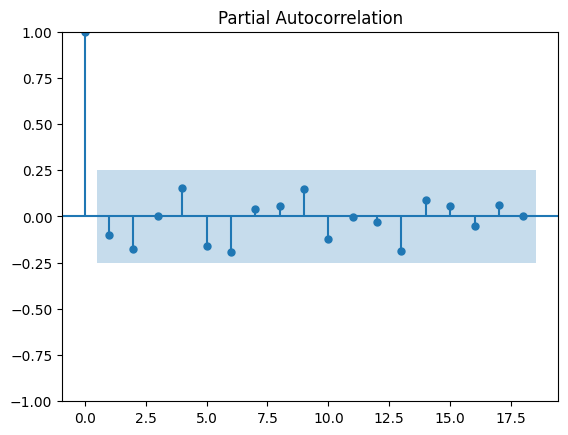

In [46]:
# Plot ACF and PACF plots for each country's data (after differencing)
countries = {'Burkina Faso': df_burkina, 'Cote d\'Ivoire': df_cote, 'Ghana': df_ghana, 'Togo': df_togo}
for country, data in countries.items():
    print(f'\n{country}:\n')
    ts = data['Fertility Rate'].diff().dropna().diff().dropna()
    plot_acf_pacf(ts)



> From the looks of the `ACF` and `PACF` plots, `ARIMA(1,d,1)` will be the best for all. Let's proceed and build them.



In [47]:
# Function to fit ARIMA model
def fit_arima_model(ts, order):
    """
    This function fits an ARIMA model to the given time series data.

    Parameters:
    ts (pandas.Series): The time series data.
    order (tuple): The order of the ARIMA model (p, d, q).

    Returns:
    statsmodels.tsa.arima_model.ARIMAResults: The fitted ARIMA model.

    Example usage:
    model = fit_arima_model(ts, (1, 1, 1))

    Raises:
    ValueError: If the order is invalid.
    """
    model = ARIMA(ts, order=order)
    results = model.fit()
    print(results.summary())
    return results

# **Fit the models for each country**

In [48]:
# Ghana
ghana_model = fit_arima_model(df_ghana['Fertility Rate'], (1, 1, 1))
ghana_model

                               SARIMAX Results                                
Dep. Variable:         Fertility Rate   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  99.525
Date:                Thu, 18 Jul 2024   AIC                           -193.051
Time:                        20:17:58   BIC                           -186.718
Sample:                    01-01-1960   HQIC                          -190.569
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9415      0.053     17.751      0.000       0.838       1.045
ma.L1         -0.5329      0.109     -4.879      0.000      -0.747      -0.319
sigma2         0.0022      0.000      6.099      0.0

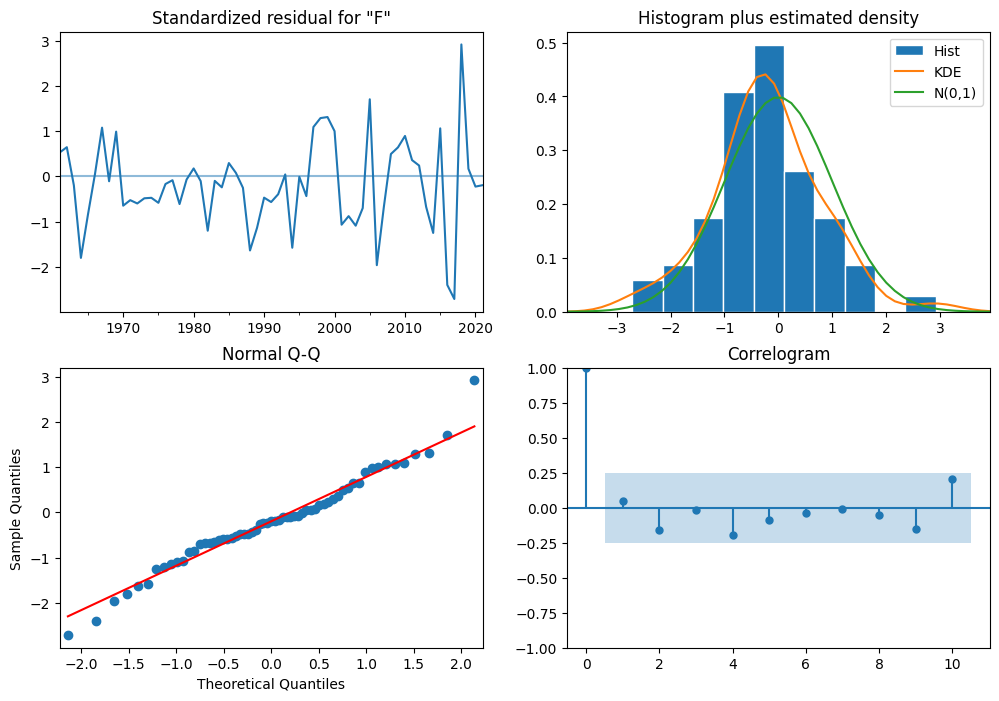

In [49]:
# model diagnostics
ghana_model.plot_diagnostics(figsize=(12, 8))
plt.show()

In [50]:
# Burkina Faso
burkina_model = fit_arima_model(df_burkina['Fertility Rate'], (1, 2, 1))
burkina_model

                               SARIMAX Results                                
Dep. Variable:         Fertility Rate   No. Observations:                   62
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 145.157
Date:                Thu, 18 Jul 2024   AIC                           -284.314
Time:                        20:17:59   BIC                           -278.031
Sample:                    01-01-1960   HQIC                          -281.856
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7092      0.326     -2.176      0.030      -1.348      -0.070
ma.L1          0.8238      0.273      3.019      0.003       0.289       1.359
sigma2         0.0005   6.64e-05      6.977      0.0

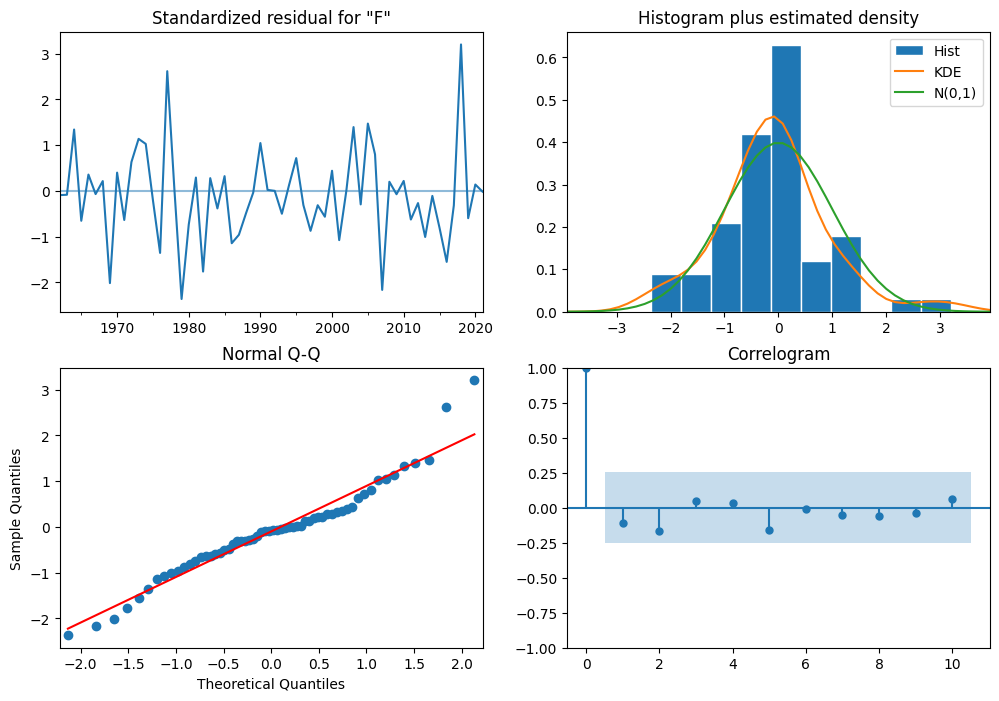

In [51]:
# model diagnostics
burkina_model.plot_diagnostics(figsize=(12, 8))
plt.show()

In [52]:
# Cote D'Ivoire
cote_model = fit_arima_model(df_cote['Fertility Rate'], (1, 2, 1))
cote_model

                               SARIMAX Results                                
Dep. Variable:         Fertility Rate   No. Observations:                   62
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 129.621
Date:                Thu, 18 Jul 2024   AIC                           -253.242
Time:                        20:18:00   BIC                           -246.959
Sample:                    01-01-1960   HQIC                          -250.784
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1365      0.304     -0.449      0.653      -0.732       0.459
ma.L1         -0.2937      0.281     -1.043      0.297      -0.845       0.258
sigma2         0.0008   6.93e-05     11.183      0.0

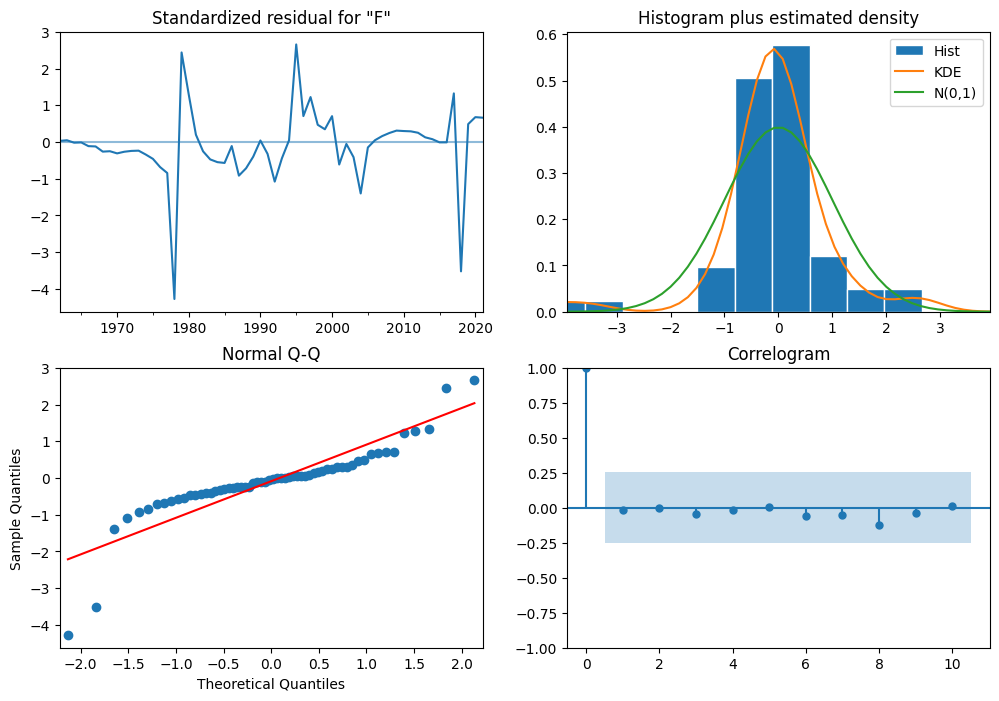

In [53]:
# model diagnostics
cote_model.plot_diagnostics(figsize=(12, 8))
plt.show()

In [54]:
# Togo
togo_model = fit_arima_model(df_togo['Fertility Rate'], (1, 2, 1))
togo_model

                               SARIMAX Results                                
Dep. Variable:         Fertility Rate   No. Observations:                   62
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 147.371
Date:                Thu, 18 Jul 2024   AIC                           -288.742
Time:                        20:18:01   BIC                           -282.459
Sample:                    01-01-1960   HQIC                          -286.284
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4490      0.662      0.678      0.498      -0.849       1.747
ma.L1         -0.5751      0.619     -0.928      0.353      -1.789       0.639
sigma2         0.0004   6.03e-05      7.136      0.0

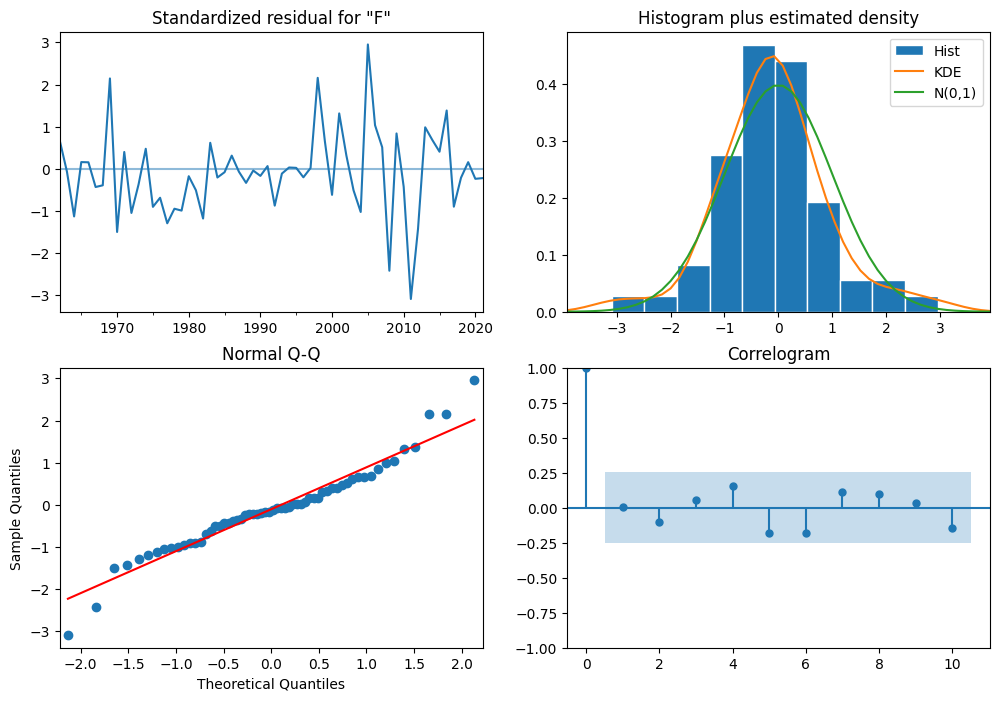

In [55]:
# model diagnostics
togo_model.plot_diagnostics(figsize=(12, 8))
plt.show()

In [56]:
# Function to plot forecast
def plot_forecast(ts, model, steps=10):
    """
    This function plots the actual and forecasted values of the time series data.

    Parameters:
    ts (pandas.Series): The time series data.
    model (statsmodels.tsa.arima_model.ARIMAResults): The fitted ARIMA model.
    steps (int, optional): The number of steps to forecast. Default is 10.

    Example usage:
    plot_forecast(ts, model, steps)
    """
    forecast = model.get_forecast(steps=steps)
    forecast_index = pd.date_range(start=ts.index[-1], periods=steps+1, freq='Y')[1:]
    forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
    plt.figure(figsize=(10, 6))
    plt.plot(ts, label='Actual')
    plt.plot(forecast_series, label='Forecast', color='red', linewidth = 3)
    plt.xlabel('Year')
    plt.ylabel('Fertility Rate')
    plt.title('Fertility Rate Forecast')
    plt.legend()
    plt.show()

In [57]:
ghana_model.forecast(steps = 20)

2022-01-01    3.511389
2023-01-01    3.462798
2024-01-01    3.417048
2025-01-01    3.373975
2026-01-01    3.333422
2027-01-01    3.295240
2028-01-01    3.259292
2029-01-01    3.225447
2030-01-01    3.193582
2031-01-01    3.163580
2032-01-01    3.135334
2033-01-01    3.108740
2034-01-01    3.083701
2035-01-01    3.060127
2036-01-01    3.037932
2037-01-01    3.017036
2038-01-01    2.997361
2039-01-01    2.978838
2040-01-01    2.961398
2041-01-01    2.944978
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [58]:
# convert the forecast to dataframe and rename the column to 'predicted fertility rate'
ghana = ghana_model.forecast(steps = 10)
ghana = ghana.to_frame()
# rename the column title
ghana.columns = ['predicted fertility rate']
ghana

,predicted fertility rate
2022-01-01,3.511389
2023-01-01,3.462798
2024-01-01,3.417048
2025-01-01,3.373975
2026-01-01,3.333422
2027-01-01,3.295240
2028-01-01,3.259292
2029-01-01,3.225447
2030-01-01,3.193582
2031-01-01,3.163580


In [59]:
burkina = burkina_model.forecast(steps = 10)
burkina = burkina.to_frame()
burkina.columns = ['predicted rate']
burkina

,predicted rate
2022-01-01,4.671190
2023-01-01,4.573082
2024-01-01,4.473058
2025-01-01,4.374393
2026-01-01,4.274764
2027-01-01,4.175819
2028-01-01,4.076388
2029-01-01,3.977302
2030-01-01,3.877972
2031-01-01,3.778814


In [60]:
cote = cote_model.forecast(steps = 10)
cote = cote.to_frame()
cote.columns = ['predicted rate']
cote

,predicted rate
2022-01-01,4.356925
2023-01-01,4.296816
2024-01-01,4.236576
2025-01-01,4.176353
2026-01-01,4.116128
2027-01-01,4.055903
2028-01-01,3.995678
2029-01-01,3.935453
2030-01-01,3.875228
2031-01-01,3.815003


In [61]:
togo = togo_model.forecast(steps = 10)
togo = togo.to_frame()
togo.columns = ['predicted rate']
togo

,predicted rate
2022-01-01,4.191838
2023-01-01,4.127052
2024-01-01,4.062435
2025-01-01,3.997894
2026-01-01,3.933387
2027-01-01,3.868895
2028-01-01,3.804410
2029-01-01,3.739929
2030-01-01,3.675448
2031-01-01,3.610968


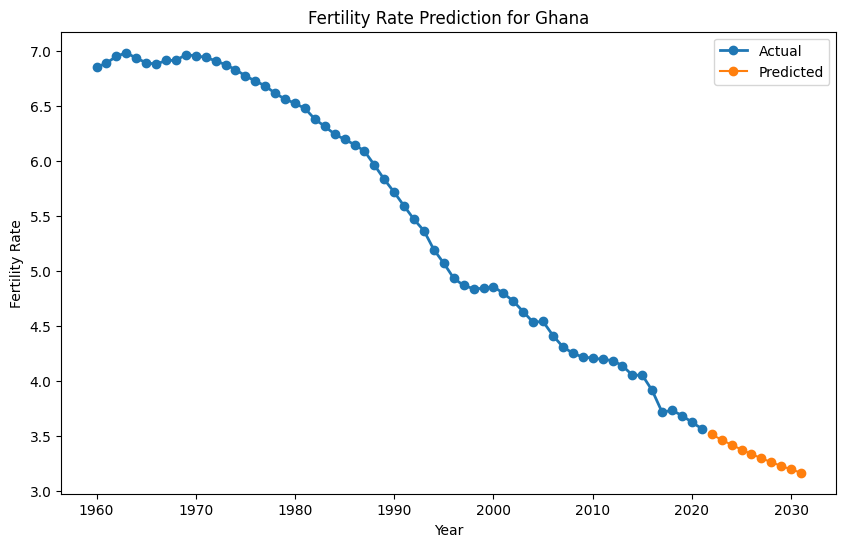

In [68]:
# plot the Ghana dataset and the predicted rates
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_ghana['Fertility Rate'], label='Actual', linewidth = 2, marker = 'o')
ax.plot(ghana['predicted fertility rate'], label='Predicted', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Fertility Rate')
ax.set_title('Fertility Rate Prediction for Ghana')
ax.legend()
plt.show()

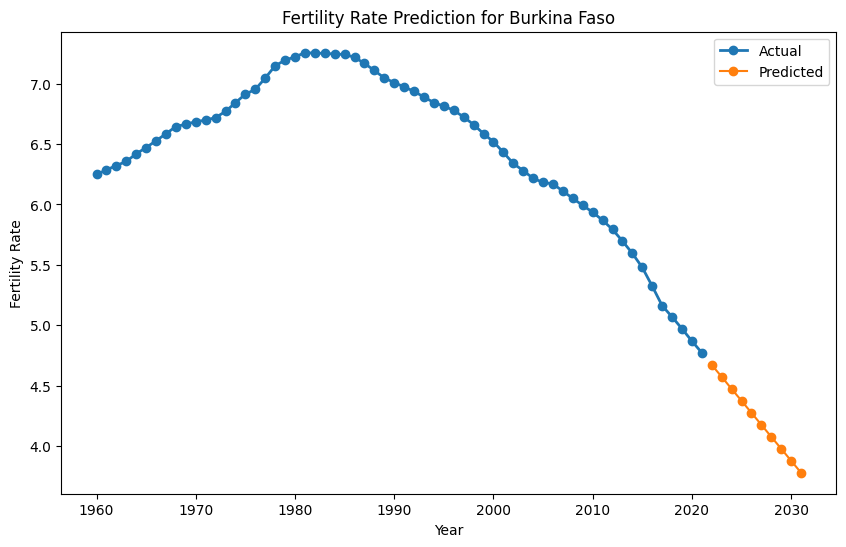

In [70]:
# plot the Burkina Faso dataset and the predicted rates
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_burkina['Fertility Rate'], label='Actual', linewidth = 2, marker = 'o')
ax.plot(burkina['predicted rate'], label='Predicted', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Fertility Rate')
ax.set_title('Fertility Rate Prediction for Burkina Faso')
ax.legend()
plt.show()

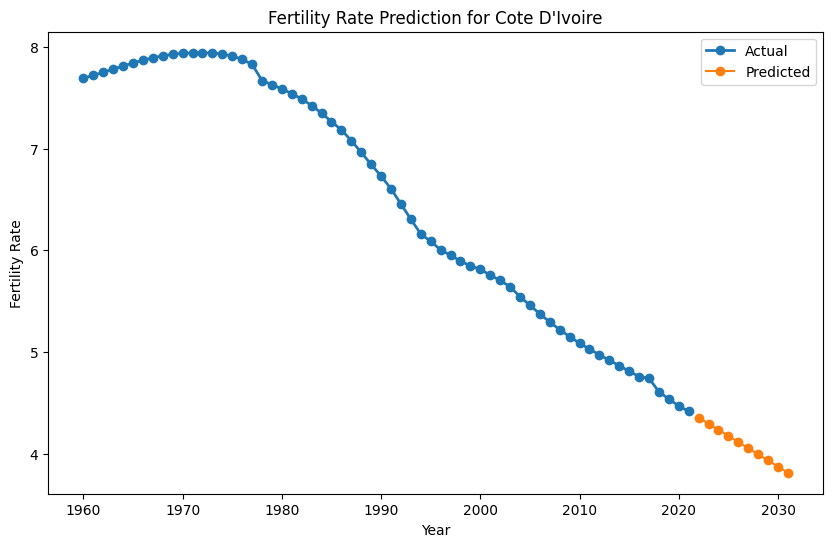

In [71]:
# plot the Cote D'Ivoire dataset and the predicted rates
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_cote['Fertility Rate'], label='Actual', linewidth = 2, marker = 'o')
ax.plot(cote['predicted rate'], label='Predicted', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Fertility Rate')
ax.set_title("Fertility Rate Prediction for Cote D'Ivoire")
ax.legend()
plt.show()

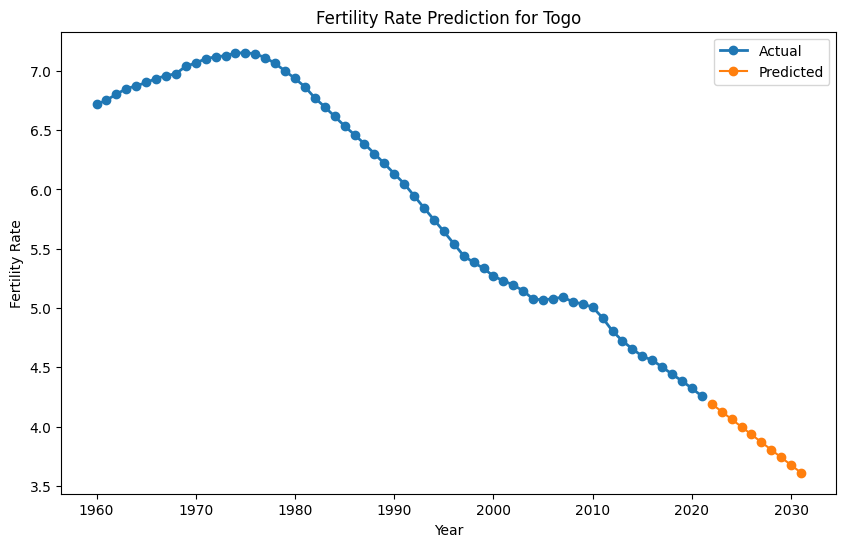

In [72]:
# plot the Togo dataset and the predicted rates
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_togo['Fertility Rate'], label='Actual', linewidth = 2, marker = 'o')
ax.plot(togo['predicted rate'], label='Predicted', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Fertility Rate')
ax.set_title('Fertility Rate Prediction for Togo')
ax.legend()
plt.show()